### Stock Market Prediction 
#### Implementing and training a regression model to predict the `Close` price of Apple stock index [**AAPL**](https://www.google.com/finance/quote/AAPL:NASDAQ). 

In [1]:
# Import all necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Part I - Preprocessing

In [2]:
!pip install pandas-datareader

In [3]:
import pandas_datareader as pdr

In [4]:
df = pdr.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-02-26')
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-12,135.529999,133.690002,134.350006,135.369995,60029300.0,135.369995
2021-02-16,136.009995,132.789993,135.490005,133.190002,80576300.0,133.190002
2021-02-17,132.220001,129.470001,131.250000,130.839996,97918500.0,130.839996
2021-02-18,130.000000,127.410004,129.199997,129.710007,96856700.0,129.710007
2021-02-19,130.710007,128.800003,130.240005,129.869995,87668800.0,129.869995
2021-02-22,129.720001,125.599998,128.009995,126.000000,103916400.0,126.000000
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998


In [5]:
df.reset_index(inplace=True)
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2303.000000,2303.000000,2303.000000,2303.000000,2.303000e+03,2303.000000
mean,40.768029,39.915350,40.345086,40.357003,2.269361e+08,38.642441
std,27.399500,26.611593,27.029006,27.021137,1.790992e+08,27.631704
min,14.271429,13.753571,13.856071,13.947500,4.544800e+07,12.191197
25%,23.092501,22.705357,22.855893,22.805893,1.093298e+08,20.391053
50%,30.525000,30.045000,30.247499,30.295000,1.641152e+08,28.159733
75%,47.552500,46.763750,47.190001,47.182501,2.791866e+08,46.051743
max,145.089996,141.369995,143.600006,143.160004,1.506120e+09,142.946396


In [6]:
# Calculate the correlations
corr = df.corr(method='pearson')
corr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999685,0.999825,0.999780,-0.386792,0.999636
Low,0.999685,1.000000,0.999748,0.999787,-0.395065,0.999657
Open,0.999825,0.999748,1.000000,0.999593,-0.389839,0.999440
Close,0.999780,0.999787,0.999593,1.000000,-0.391277,0.999859
Volume,-0.386792,-0.395065,-0.389839,-0.391277,1.000000,-0.396361
Adj Close,0.999636,0.999657,0.999440,0.999859,-0.396361,1.000000


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

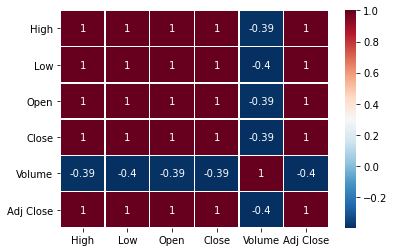

In [8]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5)

In [9]:
# Prepare the dataframe
df = df.drop(columns=['Volume', 'Adj Close'])
df.head(10)

,Date,High,Low,Open,Close
0,2012-01-03,14.732143,14.607143,14.621429,14.686786
1,2012-01-04,14.810000,14.617143,14.642857,14.765714
2,2012-01-05,14.948214,14.738214,14.819643,14.929643
3,2012-01-06,15.098214,14.972143,14.991786,15.085714
4,2012-01-09,15.276786,15.048214,15.196429,15.061786
5,2012-01-10,15.214286,15.053571,15.211071,15.115714
6,2012-01-11,15.101786,14.975357,15.095714,15.091071
7,2012-01-12,15.103571,14.955357,15.081429,15.049643
8,2012-01-13,15.016071,14.952143,14.989286,14.993214
9,2012-01-17,15.213929,15.105714,15.150000,15.167857


<AxesSubplot:title={'center':'Apple Stocks Closing Price History 2012-2021'}, xlabel='Date', ylabel='Close Price US($)'>

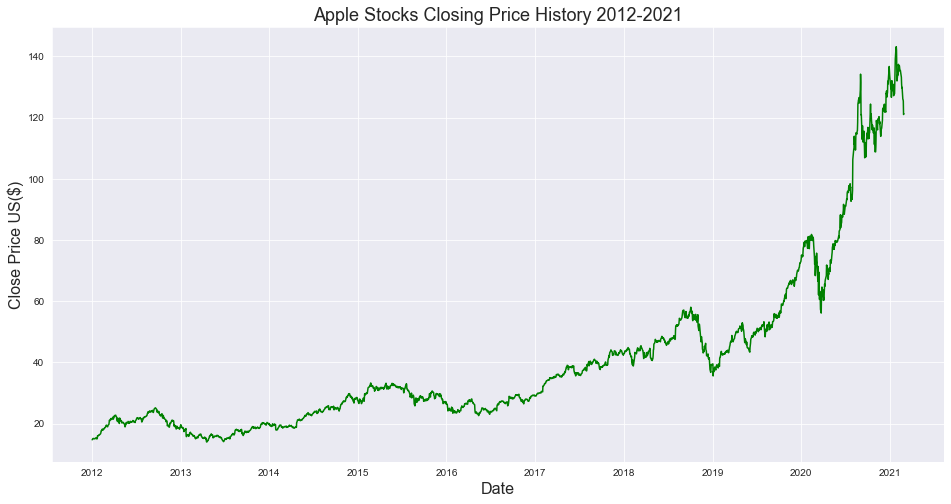

In [74]:
sns.set_style("darkgrid")
plt.figure(figsize=(16,8))

plt.title("Apple Stocks Closing Price History 2012-2021", fontsize = 18)
plt.xlabel("Date", fontsize = 16)
plt.ylabel("Close Price US($)", fontsize = 16)

sns.lineplot(data=df, x='Date', y='Close', color='green')

In [11]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [12]:
aapl = df[['Day', 'Month', 'Year', 'High', 'Open', 'Low', 'Close']]
aapl.tail(10)

,Day,Month,Year,High,Open,Low,Close
2293,12,2,2021,135.529999,134.350006,133.690002,135.369995
2294,16,2,2021,136.009995,135.490005,132.789993,133.190002
2295,17,2,2021,132.220001,131.250000,129.470001,130.839996
2296,18,2,2021,130.000000,129.199997,127.410004,129.710007
2297,19,2,2021,130.710007,130.240005,128.800003,129.869995
2298,22,2,2021,129.720001,128.009995,125.599998,126.000000
2299,23,2,2021,126.709999,123.760002,118.389999,125.860001
2300,24,2,2021,125.559998,124.940002,122.230003,125.349998
2301,25,2,2021,126.459999,124.680000,120.540001,120.989998
2302,26,2,2021,124.849998,122.589996,121.199997,121.260002


In [13]:
# Separate features from the target
X = df[['Day', 'Month', 'Year', 'High', 'Open', 'Low']]
y = df['Close']

In [14]:
print(X.shape)
print(y.shape)

(2303, 6)
(2303,)


In [15]:
X

,Day,Month,Year,High,Open,Low
0,3,1,2012,14.732143,14.621429,14.607143
1,4,1,2012,14.810000,14.642857,14.617143
2,5,1,2012,14.948214,14.819643,14.738214
3,6,1,2012,15.098214,14.991786,14.972143
4,9,1,2012,15.276786,15.196429,15.048214
...,...,...,...,...,...,...
2298,22,2,2021,129.720001,128.009995,125.599998
2299,23,2,2021,126.709999,123.760002,118.389999
2300,24,2,2021,125.559998,124.940002,122.230003
2301,25,2,2021,126.459999,124.680000,120.540001


In [16]:
y

0        14.686786
1        14.765714
2        14.929643
3        15.085714
4        15.061786
           ...    
2298    126.000000
2299    125.860001
2300    125.349998
2301    120.989998
2302    121.260002
Name: Close, Length: 2303, dtype: float64

In [17]:
# Partition the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1727, 6)
(576, 6)
(1727,)
(576,)


## Part-II Linear Regression with Closed Form Solution (Least Squares)

In [19]:
# Compute theta_best using normal equation
theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [20]:
theta_best.shape

(6,)

In [21]:
# Make predictions on X_test using theta_best
y_pred_ls = X_test.dot(theta_best)

In [22]:
def mse(y_true, y_pred):
    return np.square(np.subtract(y_true, y_pred)).mean()

In [23]:
def rmse(y_true, y_pred):
    return np.sqrt(np.square(np.subtract(y_true, y_pred)).mean())

In [24]:
def mae(y_true, y_pred):
    return np.abs(np.subtract(y_true, y_pred)).mean()

In [25]:
MSE_np = mse(y_test, y_pred_ls)
mse_ls = round(MSE_np, 10)

RMSE_np = rmse(y_test, y_pred_ls)
rmse_ls = round(RMSE_np, 10)

MAE_np = mae(y_test, y_pred_ls)
mae_ls = round(MAE_np, 10)

print('LS MSE', mse_ls)
print('LS RMSE', rmse_ls)
print('LS MAE', mae_ls)

LS MSE 0.1797674061
LS RMSE 0.4239898655
LS MAE 0.2245923166


In [26]:
print("{:.25f}".format(MAE_np))

0.2245923165665354437336987


In [27]:
# Compute mae and mse of LS model by sklearn methods
MAE_sl = mean_absolute_error(y_test, y_pred_ls)
sklearn_mae_ls = round(MAE_sl, 10)

MSE_ls = mean_squared_error(y_test, y_pred_ls)
sklearn_mse_ls = round(MSE_ls, 10)

In [28]:
# Scores computed by the functions should be equal to the scores computed by sklearn methods
if sklearn_mae_ls == mae_ls:
    print('MAE is correct!')
else:
    print('MAE is wrong!')
    
if sklearn_mse_ls == mse_ls:
    print('MSE is correct!')
else:
    print('MSE is wrong!')  

MAE is correct!
MSE is correct!


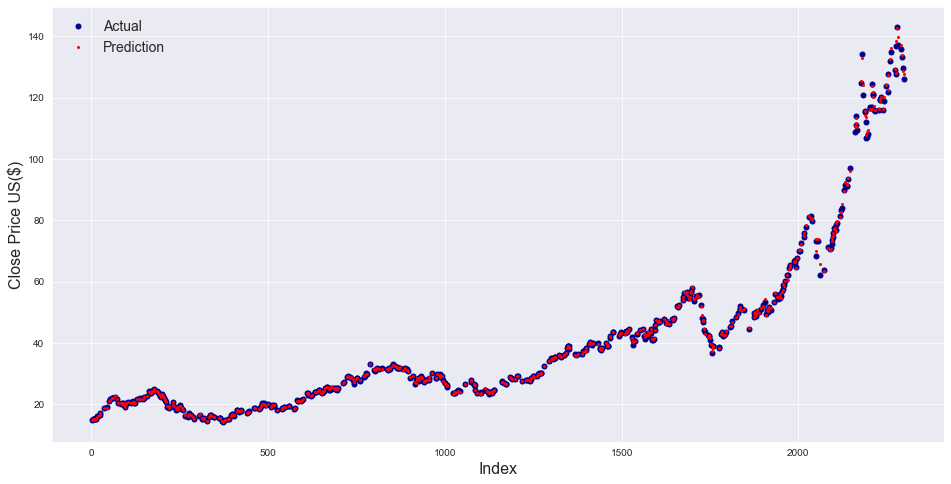

In [75]:
plt.figure(figsize=(16,8))

plt.xlabel("Index", fontsize = 16)
plt.ylabel("Close Price US($)", fontsize = 16)

plt.plot(y_test, 'o', markersize = 5, color='darkblue', label="Actual")
plt.plot(y_pred_ls, 'o', markersize = 2, color='red', label="Prediction")

plt.legend(prop={'size':14}, frameon = False)

## Part-III  Scikit-learn Linear Regression, SVM and XGBoost

In [30]:
# Build a LinearRegression model and train it on (X_train, y_train)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [31]:
# Test lin_reg on X_test
y_pred_lin_reg = lin_reg.predict(X_test)

In [32]:
# Compute rmse for lin_reg using your own rmse function
rmse_lin_reg = rmse(y_test, y_pred_lin_reg)
print('Linear Regression RMSE', rmse_lin_reg)

Linear Regression RMSE 0.42460648800085216


<AxesSubplot:xlabel='Prediction', ylabel='Actual'>

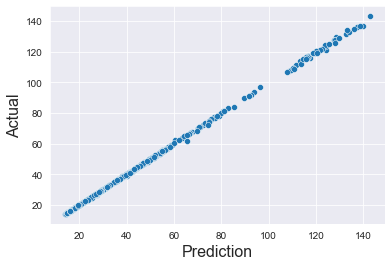

In [33]:
plt.xlabel("Prediction", fontsize = 16)
plt.ylabel("Actual", fontsize = 16)

sns.scatterplot(x=y_pred_lin_reg, y=y_test)

In [34]:
# Build a SVR (SVM Regression) model and train it on (X_train, y_train), kernel should be 'linear'
svm_reg = SVR(kernel='linear')
svm_reg.fit(X_train, y_train)

SVR(kernel='linear')

In [35]:
# Test svm_reg
y_pred_svm = svm_reg.predict(X_test)

In [36]:
# Compute rmse for svm_reg
rmse_svm = rmse(y_test, y_pred_svm)
print('SVM RMSE', rmse_svm)

SVM RMSE 0.5413391788499932


In [37]:
# Build a xgb regression model and train it on (X_train, y_train)
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective = 'reg:squarederror')
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
# Test xgb_reg
y_pred_xgb = xgb_reg.predict(X_test)

In [39]:
# Compute rmse for xgb_reg
rmse_xgb = rmse(y_test, y_pred_xgb)
print('XGB RMSE', rmse_xgb)

XGB RMSE 0.653267038933952


In [67]:
xgb_reg = xgb.XGBRegressor()# Fine-tune hyperparameters of XGBoost

param_distribution = {  
         'eta':  [0.01,0.025, 0.05, 0.1, 0.25, 0.3, 0.5, 0.7, 1.0],
         'max_depth': [3, 4, 5, 8, 10, 12, 14, 15],
         'n_estimators': [50, 75, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900], 
         'gamma' : [0, 0.01, 0.025, 0.05, 0.1, 0.25, 0.3],
         'num_parallel_tree': [1, 3, 5, 7, 10, 20, 25, 30, 35, 40, 45, 50],
        'tree_method' : ['auto', 'exact'],
        'booster': ['gbtree', 'gblinear', 'dart']
}

randomized_search = RandomizedSearchCV(xgb_reg, param_distribution)
best_xgb_reg = randomized_search.fit(X_train, y_train)
print('Randomyized search for hyperparameter tuning of XGBoost Regressor')
print('Best Parameters: ' + str(best_xgb_reg.best_params_))

[14:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth, num_parallel_tree, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth, num_parallel_tree, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:12:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth, num_parallel_t

In [70]:
best_xgb = best_xgb_reg.best_estimator_
best_xgb.fit(X_train, y_train)
y_pred_best_xgb = best_xgb.predict(X_test)
rmse_best_xgb = rmse(y_test, y_pred_best_xgb)
print('Best XGB RMSE', rmse_best_xgb) 

[17:40:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma, max_depth, num_parallel_tree, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best XGB RMSE 0.48106025675331604


In [73]:
# Calculate the coefficient of determination
r2_ls = r2_score(y_test, y_pred_ls)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
r2_svm = r2_score(y_test, y_pred_svm)
r2_xgb = r2_score(y_test, y_pred_xgb)
print('Least Squares R2: ', r2_ls)
print('Linear Regression R2: ', r2_lin_reg)
print('SVM R2: ', r2_svm)
print('XGBoost R2: ', r2_xgb)

Least Squares R2:  0.9997659658793074
Linear Regression R2:  0.9997652846571803
SVM R2:  0.9996184889272083
XGBoost R2:  0.9994444160133675
